In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seasonal_behavior_deviation as sbd

# Test data is a subset of Traffic data from MN Department of Transportation
# https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume#

# CSV settings
path = "./traffic_volume.csv"
sep = ";"
timestamp_col_name = "timestamp"
value_col_name = "traffic_volume"
granularity = "1D"

## Import and Preparation

In [2]:
# import
df = pd.read_csv(path, sep=sep, header=0)

# parse timestamp column
df.loc[:, timestamp_col_name] = pd.to_datetime(df[timestamp_col_name], infer_datetime_format=True)

# keep only the necessary columns: timestamp and value
df = df.filter([timestamp_col_name, value_col_name])

# remove duplicate rows
df = df.drop_duplicates(keep='first')

# set index to timestamp column, required for resampling
df = df.set_index(timestamp_col_name, drop=False)

# apply the given granularity
df = df.resample(granularity, label='right', closed='right').sum()
df

,traffic_volume
timestamp,
2017-09-02,95808
2017-09-03,70631
2017-09-04,65589
2017-09-05,57032
2017-09-06,87387
...,...
2018-09-27,88738
2018-09-28,87890
2018-09-29,93552


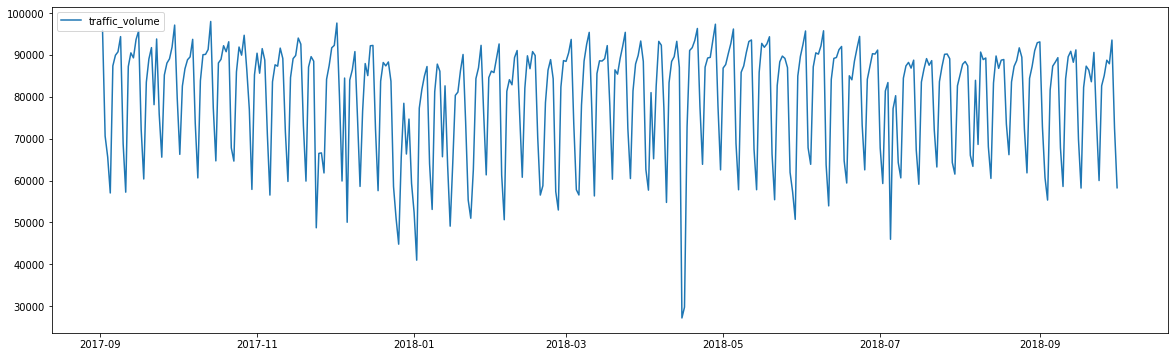

In [3]:
# have a glance at the data
plt.figure(figsize=(20, 6))
plt.plot(df.index, df[value_col_name], label=value_col_name)
plt.legend(loc="upper left")
plt.show()

## Anomaly Detection
The SBD algorithm requires two parameters:
1. season_length (int): The number of rows, which represent one season. For this dataset, we assume a weekly seasonality. Since we chose a resolution of one day, we set "season_length" to 7.
2. window_size (int): This parameter specifies how fine SBD should narrow down the discords. With smaller window_size, the anomaly_score vector becomes spikier, and the single anomalies become clear. By choosing higher values, the score curve becomes smoother. Moreover, with greater window_sizes, multiple close anomalies can be summarized to one large anomaly (see January 2018). The default for window_size is 3.

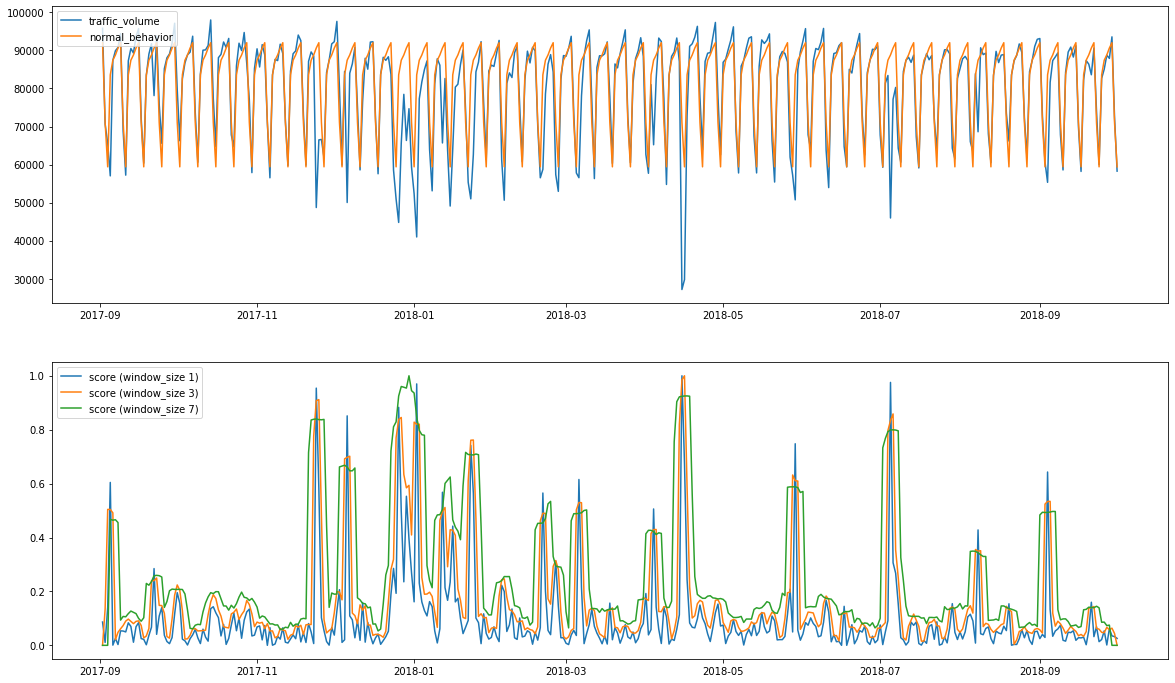

In [4]:
# assuming a weekly seasonality at a resolution of 1 day 
season_length = 7

# multiple window sizes for comparison
window_sizes = [1, 3, 7]

fig, (overview_plot, score_plot) = plt.subplots(2, figsize=(20, 12))

# compute and plot scores for each window size
for window_size in window_sizes:
    df = sbd.detect_anomalies(data=df[value_col_name], season_length=season_length, window_size=window_size)
    score_plot.plot(df.index, df["score"], label="score (window_size %i)" % window_size)

# plot the original data and the extracted normal_behavior
overview_plot.plot(df.index, df[value_col_name], label=value_col_name)
overview_plot.plot(df.index, df["normal_behavior"], label="normal_behavior")
overview_plot.legend(loc="upper left")
score_plot.legend(loc="upper left")

plt.show()